In [99]:
# Import packages
%reset -f
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, get_loss_plot, plot_loss
import numpy as np
import cv2

In [100]:
def prep_data(data_path):
    '''
    --------------------
    Prepare data
    Use vectorized flatten
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Load
    X_train, y_train, X_dev, y_dev, X_test, y_test = load_all_data(data_path)
    
    # Flatten
    X_train_flattened = vectorized_flatten(X_train)
    X_dev_flattened = vectorized_flatten(X_dev)
    X_test_flattened = vectorized_flatten(X_test)
    
    # Reshape labels
    y_train = y_train.reshape(1, -1)
    y_dev = y_dev.reshape(1, -1)
    y_test = y_test.reshape(1, -1)
    
    # Return
    return(X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test)

In [101]:
def initialize(X): 
    '''
    --------------------
    Parameter Initialization
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X [n = 12000])
    --------------------
    Output: 
    weights: Weight terms initialized as random normals
    biases: Bias terms initialized to zero
    --------------------
    '''
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(h2, h1)
    
    dim3 = 1/np.sqrt(W2.shape[1])
    W3 = dim3 * np.random.randn(1, h2)

    b1 = np.zeros((h1, 1))
    b2 = np.zeros((h2, 1))
    b3 = np.zeros((1, 1))
    
    weights = (W1, W2, W3)
    biases = (b1, b2, b3)
    
    return weights, biases

In [102]:
def forward_pass(X, weights, biases):
    '''
    ----------------------------------
    Forward propogation:
    Send inputs through the network to
    generate output
    ----------------------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    weights: Binary (1/0) training label (shape = n X 1)
    biases:
    --------------------
    Output: 
    activations: vector of results from passing
    inputs through each neuron
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    
    z3 = W3 @ a2 + b3
    a3 = sigmoid(z3)
    
    activations = (z1, a1, z2, a2, z3, a3)
    
    return activations

In [103]:
def backpropagation(X, y, weights, biases, activations):
    '''
    --------------------
    Backpropagation
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/0) training label (shape = n X 1)
    weights: Current set of weights
    biases: Current set of biases
    activations: Current set of activations
    --------------------
    Output: 
    Derivatives required
    for optimization update
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    z1, a1, z2, a2, z3, a3 = activations
    m = max(y.shape)
    # print(m)
    
    dz3 = (a3 - y)/m
    # print("dz3", dz3.shape)
    
    dW3 = np.dot(dz3, a2.T)
    # print("dW3", dW3.shape)
    
    db3 = np.sum(dz3, axis=1).reshape(-1, 1)
    # print("db3", db3.shape)
    
    da2 = np.dot(W3.T, dz3)
    # print("da2", da2.shape)
    
    dz2 = da2 * sigmoid_derivative(z2)
    # print("dz2", dz2.shape)
    
    dW2 = np.dot(dz2, a1.T)
    # print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)
    # print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    # print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    # print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)
    # print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)
    # print("db1", db1.shape)
    
    return db1, dW1, db2, dW2, db3, dW3

In [104]:
def update_parameters(weights, biases, gradients, learning_rate):
    '''
    --------------------
    Update parameters
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    db1, dW1, db2, dW2, db3, dW3 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
    W3 = gradient_update(W3, learning_rate, dW3)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    b3 = gradient_update(b3, learning_rate, db3)
    
    weights = (W1, W2, W3)
    biases = (b1, b2, b3)
    
    return weights, biases

In [105]:
def finite_differences(example, truth, weights, biases, delta_h=1e-9):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    I, J = W3.shape # Change here
    
    deltaW = np.zeros((I, J))
    
    activations = forward_pass(example, weights, biases)
    db1, dW1, db2, dW2, db3, dW3 = backpropagation(example, truth, weights, biases, activations)
    
    for i in range(I):
        for j in range(J):
    
            W_plus = np.copy(W3) # Change here
            W_minus = np.copy(W3) # Change here
            
            W_plus[i][j] += delta_h
            W_minus[i][j] -= delta_h
            
            weights_plus = [W1, W2, W_plus] # Change here
            weights_minus = [W1, W2, W_minus] # Change here
            
            activations_plus = forward_pass(example, weights_plus, biases)
            activations_minus = forward_pass(example, weights_minus, biases)

            loss_plus = get_log_loss(truth, activations_plus[-1])
            loss_minus =  get_log_loss(truth, activations_minus[-1])

            deltaW[i][j] = (loss_plus - loss_minus)/(2 * delta_h)

    difference = np.linalg.norm(dW3 - deltaW) # Change here
    
    return dW3, deltaW, difference, activations_plus[-1], activations_minus[-1] # Change here

In [106]:
def run_finite_differences(X_train_flattened, y_train, w, b, idx=10):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    dW, deltaW, difference, activations_plus, activations_minus = finite_differences(X_train_flattened[:, idx].reshape(-1, 1), 
                                                                  y_train[:, idx].reshape(-1, 1), w, b)
    
    print("dW", dW)
    print("deltaW", deltaW)
    print("difference", difference)
    print(activations_plus, activations_minus)
    
    return(dW, deltaW, difference, activations_plus, activations_minus)
    
    

In [107]:
def train(X, y, w, b, h1, h2, lr, epochs):    
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Initialize history object
    history = {
        "weights": [w],
        "losses": [], 
        "biases": [b],
        "accuracies": []
    }
    
    # Do this for the specified epochs
    for epoch in range(epochs):
        
        # Get weights and bias iterables
        w = history['weights'][epoch]
        b = history['biases'][epoch]
        
        # Forward pass to get activations
        activations = forward_pass(X, w, b)
        
        # Backward pass to get gradients
        gradients = backpropagation(X, y, w, b, activations)
        
        # Gradient descent update
        w, b = update_parameters(w, b, gradients, lr)
    
        # Get last layer output
        y_prob = activations[-1]
        
        # Threshold
        y_pred = np.where(y_prob > 0.5, 1, 0)
    
        # Get loss and accuracy results
        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)
    
        # Append results to history
        history["losses"].append(loss)
        history["biases"].append(b)
        history["weights"].append(w)
        history["accuracies"].append(accuracy)
        
        # Stop training if numerical loss underflows
        if np.isnan(loss): 
            break
        
        # Display loss for monitoring
        print(loss)
    
    # Return statement
    return(history)

In [108]:
def get_best_results(history):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    best_epoch = np.array(history["losses"][:-1]).argmin()
    
    print(f"best accuracy: {history['accuracies'][best_epoch]}")
    print(f"best loss: {history['losses'][best_epoch]}")
    print(f"best epoch: {best_epoch}")
    
    return(best_epoch)

In [109]:
def get_dev_results(X_dev, y_dev, history, best_epoch):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    w = history["weights"][best_epoch]
    b = history["biases"][best_epoch]
    activations = forward_pass(X_dev, w, b)

    y_dev_prob = activations[-1]
    y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)

    loss = get_log_loss(y_dev, y_dev_prob)
    accuracy = get_accuracy(y_dev, y_dev_pred)
    print(f"Dev set accuracy: {accuracy}")
    
    return(accuracy)

In [110]:
def execute_pipeline(data_path, idx, h1, h2, lr, epochs):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Set seed for reproducible results
    np.random.seed(1252908)

    # Get data
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)

    # Initialize weights
    weights, biases = initialize(X_train_flattened)
    
    # Check finite difference
    dW, deltaW, difference, activations_plus, activations_minus = run_finite_differences(X_train_flattened, y_train, weights, biases, idx=10)
    
    # Now enter training loop
    training_history = train(X_train_flattened, y_train, weights, biases, h1, h2, lr, epochs)
    
    # Display plots to monitor whether loss functions are correct shape
    plot_loss("loss.png", training_history["losses"][:-2])
    
    # Plot accuracy
    plot_loss("accuracy.png", training_history["accuracies"][:-2], label='Training Accuracy')
    
    # Get weights and biases from best training epoch
    best_training_epoch = get_best_results(training_history)
    
    # Get dev results
    get_dev_results(X_dev_flattened, y_dev, training_history, best_training_epoch)

In [111]:
# Set path to data
data_path = '../setup/data'

In [112]:
# Set no. of observations to use for checking finite differences
idx = 10

In [113]:
# Set perceptron parameters: architecture, learning rate, and no. of training epochs
h1 = 8
h2 = 4
lr = 0.1
epochs = 2000

dW [[-0.18303023 -0.17351476 -0.17373708 -0.1751518 ]]
deltaW [[-0.18303023 -0.17351479 -0.17373702 -0.1751517 ]]
difference 1.1720561891713362e-07
[[0.64527729]] [[0.64527729]]
8856.98772533434
8804.027826511698
8756.26191200587
8713.192102774574
8674.365526215688
8639.370822258705
8607.834800866247
8579.41927148205
8553.81805730353
8530.754201012178
8509.977363622409
8491.261414249902
8474.402205691924
8459.21552859966
8445.535235564059
8433.211525505627
8422.109378245372
8412.107128945605
8403.095172167396
8394.974785532515
8387.657063349303
8381.06195102306
8375.117371589047
8369.75843625531
8364.926731403095
8360.569675051076
8356.639936334612
8353.094912075809
8349.896255019245
8347.00944877844
8344.403424978214
8342.050218487086
8339.924657012296
8338.00408167842
8336.268095530399
8334.698337194171
8333.27827719514
8331.9930346775
8330.829212488261
8329.774748790005
8328.81878354776
8327.951538399451
8327.164208567652
8326.448865604296
8325.798369880713
8325.20629184437
8324.666

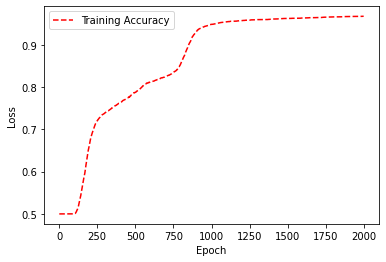

In [114]:
# Execute pipeline
execute_pipeline(data_path, idx, h1, h2, lr, epochs)